**Tema: Segmentación de clientes de un negocio mayorista.**

**Autor: Francisco Moyano Escalera.**

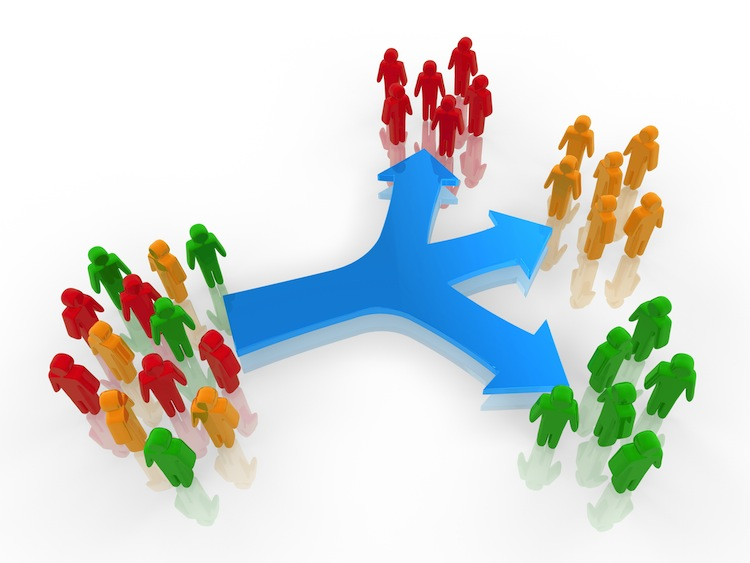

**1) Introducción**

Se cuenta con una base de datos de un negocio mayorista con datos de las cantidades vendidas de sus productos a distintos clientes. Se quiere llevar a cabo una segmentación de los clientes para poder determinar con precisión las necesidades de cada grupo, de tal manera que la empresa las pueda atender mejor, ofreciéndole a cada uno de ellos el producto adecuado.

**2) Fuente de datos**

La base de datos está compuesta por las siguientes columnas:

* Channel: número identificatorio del canal a través del cual se hizo la venta.
* Region: número identificatorio de la región a la cual pertenece el cliente.
* Fresh: cantidad de productos frescos vendidos.
* Milk: cantidad de leche vendida.
* Grocery: cantidad de productos comestibles vendidos.
* Frozen: cantidad de productos congelados vendidos.
* Detergents_Paper: cantidad de productos de limpieza vendidos.
* Delicassen: cantidad de productos delicatessen vendidos.

**3) Objetivo**

Llevar a cabo una segmentación de los clientes mayoristas en base a sus patrones de compra.

**4) Solución planteada**

Se llevará a cabo un modelo de aprendizaje no supervisado utilizando el algoritmo k-means para segmentar a los clientes.

**5) Adquisición de Datos**

In [ ]:
# Se realiza la conexión con Google Drive, en donde se encuentra almacenada la base de datos:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Se importan las librerías a utilizar:
# ============================================================================================================================================
# Configuración warnings:
import warnings
warnings.filterwarnings("ignore")
# ============================================================================================================================================
# Tratamiento y exploración de datos:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ============================================================================================================================================
# Preprocesamiento y modelado
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# Se carga la base de datos en un dataframe:
df = pd.read_csv ("/content/drive/MyDrive/Proyectos/Marketing 2/Wholesale customers data.csv")
# Se imprime el encabezado del conjunto de datos:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# Se analiza en detalle las columnas del dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


El dataframe cuenta con 8 columnas, todas son variables cuantitativas y en principio no se cuenta con datos nulos.

In [ ]:
# Se eliminan las columnas "Channel" y "Region" ya que no son de interés para este proyecto:
df= df.drop(columns=["Channel","Region"])

**6) Análisis Exploratorio**




In [ ]:
# Se examina si el dataframe tiene datos faltantes:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count() * 100)
percent.sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ["Total Faltantes", "Porcentaje"])
missing_data

,Total Faltantes,Porcentaje
Fresh,0,0.0
Milk,0,0.0
Grocery,0,0.0
Frozen,0,0.0
Detergents_Paper,0,0.0
Delicassen,0,0.0


Se corrobora que el dataframe no tiene datos faltantes.

In [ ]:
# Se determina si el dataframe cuenta con datos duplicados:
duplicados = df.duplicated(keep=False) # Con keep=False se mantienen todos los duplicados
df[duplicados]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


El dataframe no cuenta con datos duplicados.

A continuación se calculan el promedio y la desviación estándar de las variables:


In [ ]:
# Se obtiene el promedio para cada una de las variables:
averages = df.mean()
averages

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

In [ ]:
# Se calcula la desviación estándar para cada una de las variables:
std_devs = df.std()
std_devs 

Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicassen           2820.105937
dtype: float64

Luego se realizará un gráfico de barras para observar mejor las diferencias.

In [ ]:
# Primero se crea una lista con los nombres de las columnas y una lista de índices con la misma cantidad de columnas:
x_names = df.columns
x_ix = np.arange(df.shape[1]) # se utiliza el método arange() de la librería numpy

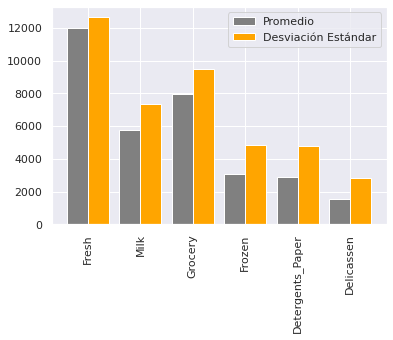

In [ ]:
# Se grafican los promedios en gris y las desviaciones estándar en naranja:
sns.set() 
plt.bar(x=x_ix-0.2, height=averages, color='grey', label="Promedio", width=0.4) # se compensan los índices en 0.2 para que no se superpongan
plt.bar(x=x_ix+0.2, height=std_devs, color='orange', label="Desviación Estándar", width=0.4)
# Se agregan las etiquetas del eje x y se coloca rotation=90 para que se visualicen bien.
plt.xticks(ticks=x_ix, labels=x_names, rotation=90)
# Se agrega la leyenda y se muestra el gráfico:
plt.legend()
plt.show()

Se puede ver que los resultados son bastante diferentes. La variable "Fresh" es la que presenta el promedio de cantidad vendida mas alto y la mayor variabilidad en sus datos.

Se visualizará en detalle la distribución de cada una de las variables y su relación con las otras:

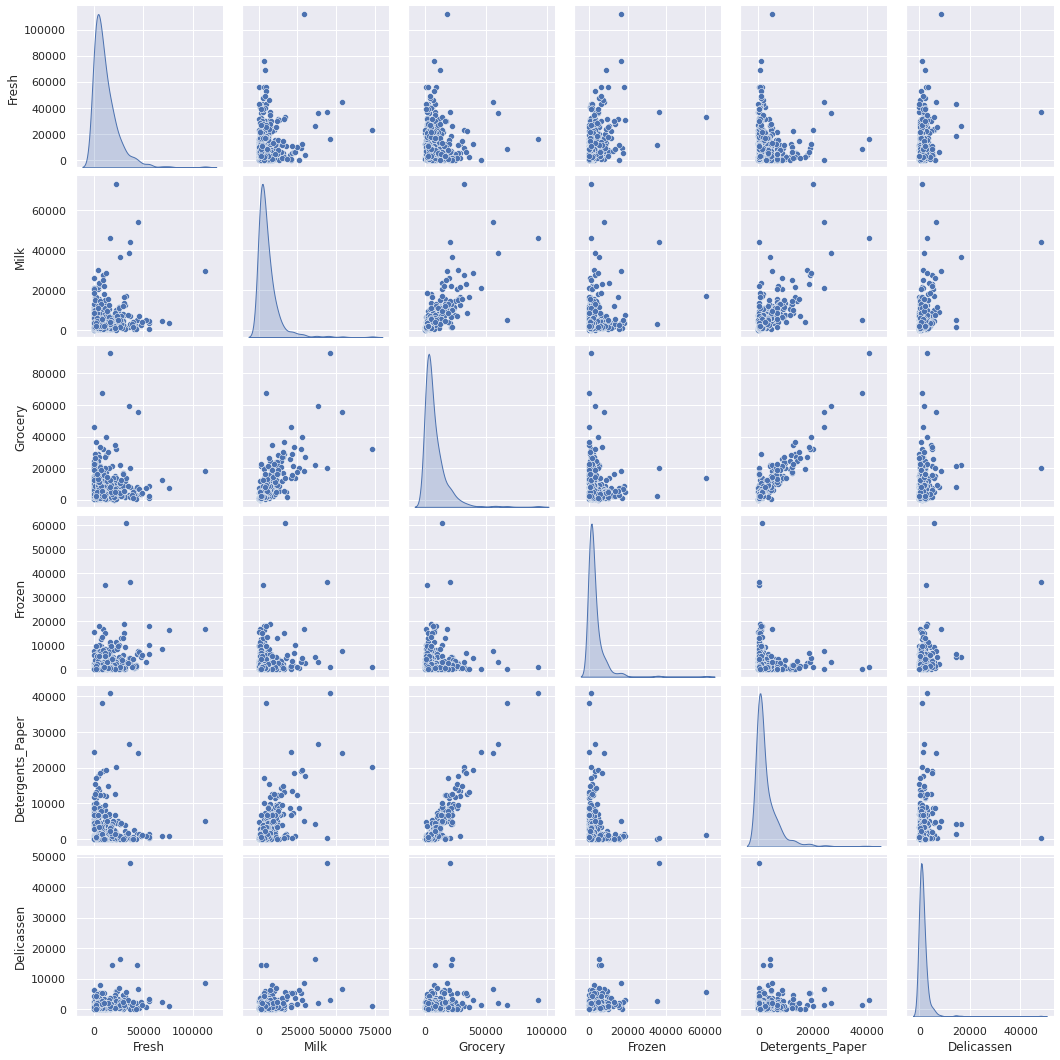

In [ ]:
# Se grafica la relación entre las variables:
sns.pairplot(df, diag_kind='kde')
plt.show()

Se puede ver que las variables no se distribuyen normalmente (presentan asimentrías), es decir, están sesgadas. A su vez se observa una relación lineal creciente marcada entre las variables "Grocery" y "Detergents_Paper".

**7) Preparación de datos para la segmentación**

Para llevar a cabo la segmentación se utilizará un modelo de aprendizaje no supervisado con el algoritmo K-means. Este algoritmo necesita que las variables estén distribuidas normalmente (es decir que no tengan asimetrías) y que los datos estén estandarizados, con un promedio de 0 y una desviación estándar de 1, con el fin de que los clústeres queden bien separados.

**- Tratamiento del sesgo de las variables**

En primer lugar se llevarà a cabo una función Box-Cox para eliminar los sesgos de las variables (una alternativa a esto sería una transformación logarítmica).

In [ ]:
# Se define la función de transformación Box-Cox
def boxcox_df(x):
    x_boxcox, _ = stats.boxcox(x) # el guión bajo significa que no se usa el segundo objeto, ya que solo importa el primero
    return x_boxcox

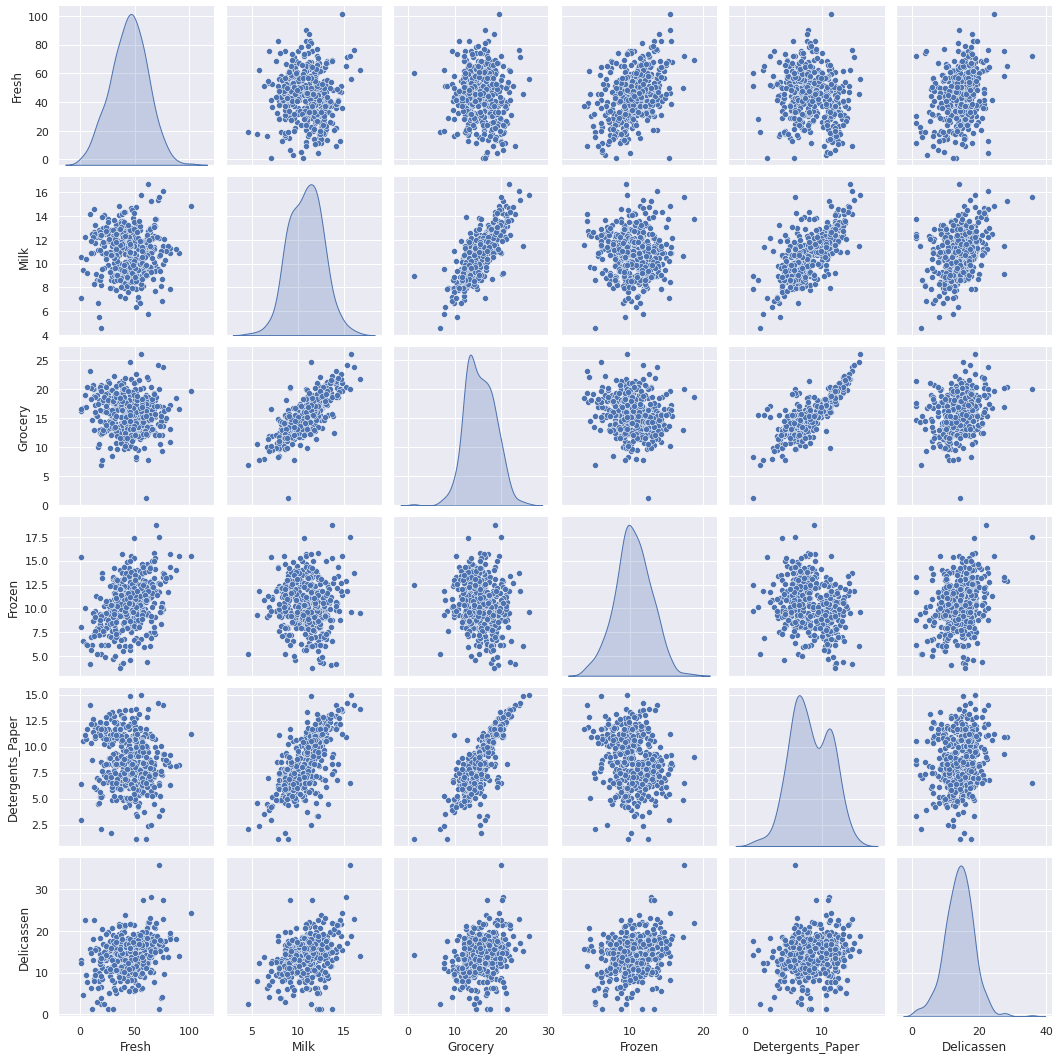

In [ ]:
# Se aplica la función creada al dataframe:
df_boxcox = df.apply(boxcox_df, axis=0)
# Se grafican las relaciones entre las variables transformadas:
sns.pairplot(df_boxcox, diag_kind='kde')
plt.show()

Se puede ver que las varibles están menos sesgadas, con más forma de campana, lo que les otorga una distribución practicamente normal.

**- Estandarización de las variables**

La estandarización consiste en primero restar el promedio de cada columna a cada uno de sus valores., esto asegura que el promedio de la columna se ajuste a cero. Luego se divide el resultado por la desviación estándar de cada columna, lo que hace que la desviación estándar de la columna sea igual a 1. 

In [ ]:
# Se ajusta la instancia inicializada del "escalador" en el conjunto de datos transformado de Box-Cox:
scaler = StandardScaler()
scaler.fit(df_boxcox)
# Se transforma y almacena el conjunto de datos escalado como "wholesale_scaled":
wholesale_scaled = scaler.transform(df_boxcox)
# Se crea un dataframe a partir del conjunto de datos escalado:
wholesale_scaled_df = pd.DataFrame(data=wholesale_scaled,
                                       index=df_boxcox.index,
                                       columns=df_boxcox.columns)

In [ ]:
# Se observa la media y la desviación estándar de las columnas:
wholesale_scaled_df.agg(["mean","std"]).round()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
mean,-0.0,0.0,-0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


Se observa que los promedios son aproximadamente cero y las desviaciones estándar son alrededor de uno, que es lo que se quería.

**8) Modelo de Aprendizaje No supervisado**

**- Cálculo  del número óptimo de clústeres** 

Por último, antes de llevar a cabo la segmentación con K-means es necesario determinar cuantos segmentos/clústers/grupos se quieren calcular. Para esto se usará el "método del codo" el cual da una estimación de cual es el número de grupos óptimo.
Para esto se itera a través de una cantidad de k valores de clúster, por ejemplo, entre 2 y 10. Luego, se ejecuta el agrupamiento de KMeans para cada valor en los mismos datos. Dentro de cada ejecución, se calcula la suma de los errores al cuadrado para ver cuánto se reduce a medida que agregamos más segmentos. Finalmente, se grafica la suma de los errores al cuadrado nuevamente k para identificar el llamado codo, donde la disminución de los errores se ralentiza y solo hay una reducción incremental con más segmentos más allá de ese punto.

In [ ]:
# Primero se crea una diccionario vacío:
sse = {}
# Luego ajusta el algoritmo KMeans en valores k entre 1 y 11:
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=333)
    kmeans.fit(wholesale_scaled_df)
    sse[k] = kmeans.inertia_



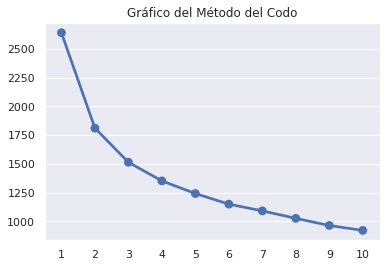

In [ ]:
# Se visualiza el gráfico:
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.title("Gráfico del Método del Codo")
plt.show()

Como se puede ver los valores óptimos de grupos son 3 ó 4. Sin embargo, si bien este es un enfoque adecuado para comenzar, el objetivo principal de la segmentación es crear una representación significativa de la base de clientes en grupos similares, que se pueda interpretar y utilizar en ofertas de productos o marketing personalizando, es decir que la segmentación tenga relevancia comercial,  por lo cual el conocimiento previo del negocio es fundamental.

**- Construcción del modelo de segmentación**

Existen numerosos modelos de aprendizaje no supervisado, en este proyecto se utilizará el algoritmo k-means (es uno de los métodos de agrupamiento en clústeres mas conocidos).


In [ ]:
# Se inicializa el algoritmo KMeans con 4 clústeres:
kmeans=KMeans(n_clusters=4, random_state=123)
# Se ajuste el modelo en el conjunto de datos preprocesados
kmeans.fit(wholesale_scaled_df)


KMeans(n_clusters=4, random_state=123)

In [ ]:
# Se asignan las etiquetas generadas a una nueva columna "Cluster":
df = df.assign(Cluster = kmeans.labels_)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,3
4,22615,5410,7198,3915,1777,5185,3
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,3
436,39228,1431,764,4510,93,2346,3
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,1


Una vez creados los segmentos la mejor forma de explorarlos es calculando el promedio, mediana u otros valores percentiles para cada variable.


In [ ]:
# Se observa en detalle la media de cada producto para cada uno de los grupos:
kmeans4_averages = df.groupby(["Cluster"]).mean().round(0)
kmeans4_averages

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,3618.0,6645.0,11296.0,703.0,4675.0,576.0
1,10229.0,1891.0,2500.0,2403.0,449.0,741.0
2,10453.0,12717.0,17723.0,1940.0,7684.0,2394.0
3,26312.0,5489.0,5228.0,8342.0,830.0,3212.0


Se pueden observar los 4 segmentos de clientes en base a los patrones de compra (en este caso el promedio) de cada uno de los 6 productos que vende el negocio mayorista. A continuación se creará un mapa de color (heatmap) para facilitar el análisis.

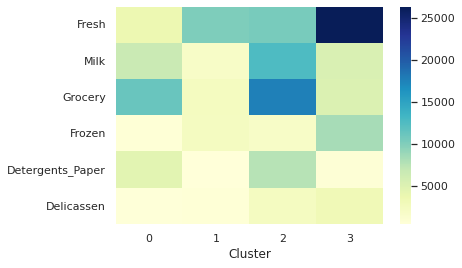

In [ ]:
# Se crea un mapa de calor para los valores promedio de cada segmento:
sns.heatmap(kmeans4_averages.T, cmap='YlGnBu') # se utiliza el método .T para que sea mas interpretable el resultado
plt.show()

**9) Conclusión**

Se puede ver facilmente la diferencia entre los segmentos. El segmento 0 está compuesto en su mayoría compradores de "Grocery" (comestibles) seguido de "Milk" (leche), el segmento 1 son en su mayoría compradores de "Fresh" (productos frescos), el segmento 2 compra en su mayoría "Grocery" (pero más que el segmento 0) seguido de leche y produtcos frescos, y finalmente el segmento 3 está compuesto por clientes compradores de gran cantidad de productos frescos.